In [2]:
using Plots
using Statistics
using StaticArrays
using Random
import Pkg
Pkg.activate("/Users/mckinleypaul/Documents/montecarlo/segc_wl/src/")
Pkg.activate("/Users/mckinleypaul/Documents/montecarlo/segc_wl")
using segc_wl 


  Activating new project at `~/Documents/montecarlo/segc_wl/src`
  Activating project at `~/Documents/montecarlo/segc_wl`


In [3]:
wl_N108_run3 = load_wanglandau_jld2("/Users/mckinleypaul/Documents/montecarlo/segc_wl/examples/analysis/N108/final_wl_run3.jld2")
wl_N108_run4 = load_wanglandau_jld2("/Users/mckinleypaul/Documents/montecarlo/segc_wl/examples/analysis/N108/final_wl_run4.jld2")


WangLandauVars(7.450580596923828e-9, [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], [100034.01020486653 100046.54481260478 … 26193.287454798818 25302.436962410808; 100046.58787664771 100059.12214908004 … 26205.81143335998 25314.987515985966; … ; 100046.58961158991 100059.16341793537 … 26053.385485708714 25315.78677237034; 100046.58898197114 100059.16808603704 … 26047.570181146264 25315.786009266973], 50367113595, 9753369491, 16788775405, 15883879311, 67155889000, 0.1140624770553474)

In [4]:
display(wl_N108_run4.logQ_λN[1,:])

109-element Vector{Float64}:
 100034.01020486653
 100046.54481260478
 100055.6472158432
 100022.64672034979
  99957.74100245535
  99815.2477362752
  99414.49606220424
  98911.2993285954
  98543.25897416472
  97811.28518506885
  97079.43978537619
  96347.5894445628
  95615.725570485
      ⋮
  33508.18989139795
  32777.044190362096
  32045.838897258043
  31314.604695871472
  30583.282342001796
  29851.867912337184
  29120.407364979386
  28388.749788686633
  27657.01334452629
  26925.19501014054
  26193.287454798818
  25302.436962410808

In [5]:
logQN108_run3 = correct_logQ(wl_N108_run3)
logQN108_run4 = correct_logQ(wl_N108_run4)

109-element Vector{Float64}:
      0.0
     12.534607738256454
     21.637010976672173
    -11.363484516739845
    -76.26920241117477
   -218.76246859133244
   -619.5141426622868
  -1122.7108762711287
  -1490.7512307018042
  -2222.7250197976828
  -2954.5704194903374
  -3686.4207603037357
  -4418.284634381533
      ⋮
 -66525.82031346858
 -67256.96601450443
 -67988.17130760849
 -68719.40550899506
 -69450.72786286473
 -70182.14229252934
 -70913.60283988714
 -71645.2604161799
 -72376.99686034024
 -73108.81519472599
 -73840.72275006771
 -74731.57324245572

In [10]:
logQN108_avg = (logQN108_run3 .+ logQN108_run4) ./ 2

109-element Vector{Float64}:
      0.0
     12.543280720710754
     21.380179934203625
    -40.77114234864712
   -136.81046223640442
   -340.9452093318105
   -824.5617657750845
  -1295.7772090807557
  -1705.8115128353238
  -2399.1643403992057
  -3131.041679099202
  -3862.8811310231686
  -4585.647235736251
      ⋮
 -66689.38424169272
 -67420.41818515956
 -68151.5175652653
 -68882.71610848606
 -69613.99253404886
 -70345.35300464183
 -71076.7578119263
 -71808.30335495621
 -72539.96434945613
 -73271.68675601482
 -74003.44724944979
 -74903.62086389959

from https://www.nist.gov/mml/csd/chemical-informatics-group/sat-tmmc-liquid-vapor-coexistence-properties-long-range 


$\ln z_{sat}^* = -3.8345$ 

$$\mu = 1/ \beta \ln \lambda^{*3}e^{-3.8345} $$

$$ T^* = 1 = \frac{k_B T}{\epsilon}$$

so at $T*=1$, $k_BT=\epsilon $ so  $\beta = 1/\epsilon$ and we are using $\epsilon = 117.05* k_B$

In [11]:
kB_J_K = 1.380649*10^(-23)
ϵ_J = 117.05*kB_J_K
λ_σ = argon_deBroglie(1.)
μ_J = (1/ϵ_J)*log( λ_σ^3 * exp(-3.8345)   )
βμ = log( λ_σ^3 * exp(-3.8345)   )

-11.601664596826994

In [12]:
expβμN = [exp.(βμ*N) for N in 0:108]

109-element Vector{Float64}:
 1.0
 9.150842587719047e-6
 8.373792006521263e-11
 7.662725251397597e-16
 7.01203925684794e-21
 6.416606745832206e-26
 5.871735827840636e-31
 5.373133027723995e-36
 4.91686945395766e-41
 4.499349839753074e-46
 4.117284213065937e-51
 3.7676619722667146e-56
 3.4477281631947366e-61
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

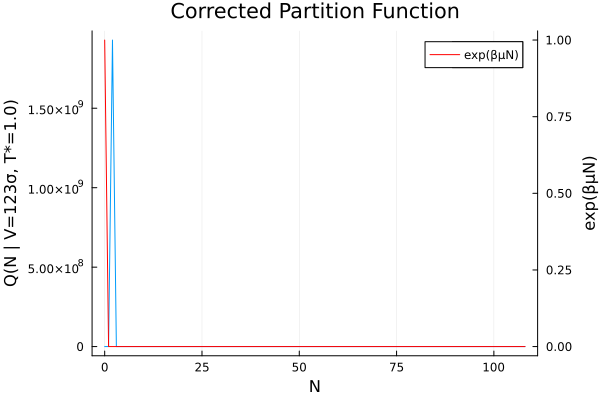

In [13]:
p3 = plot(title="Corrected Partition Function",
          xlabel="N",
          ylabel="Q(N | V=123σ, T*=1.0)")

# First y-axis
plot!(p3, 0:108, exp.(logQN108_avg), label="Q(N)")

# Second y-axis
plot!(twinx(p3), 0:108, expβμN,
      label="exp(βμN)",
      ylabel="exp(βμN)", color= "red")



In [14]:
Qstar = []
for N in 0:108
    push!(Qstar,λ_σ^(3*N)*exp(logQN108_avg[N+1]) )
end

Qstar

109-element Vector{Any}:
   1.0
 118.64266065689026
 345.79659986920973
   1.49144651537003e-28
   1.233173792093906e-73
   1.1566270200300108e-165
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   ⋮
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0

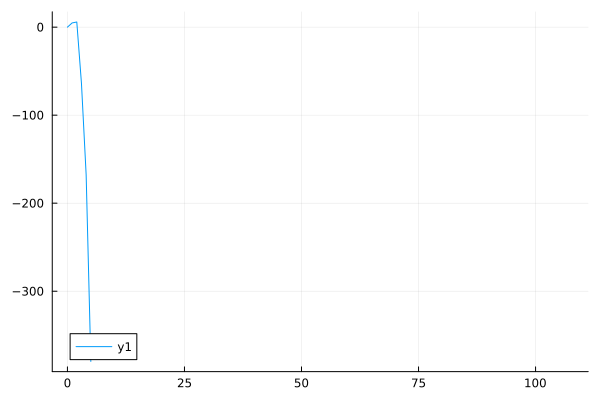

In [16]:
plot(0:108,log.(Qstar))

# Unfinished N256 runs

In [21]:
wl_N108_m10 = load_wanglandau_jld2("/Users/mckinleypaul/Documents/montecarlo/segc_wl/examples/N108_L8/N108_L8_M10/final_wl.jld2")


WangLandauVars(7.450580596923828e-9, [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], [57738.17340900004 57752.455589696765 … 2741.3459529280663 2219.2000659555197; 57752.43424475193 57766.73304872215 … 2755.716931119561 2233.471521809697; … ; 57752.470157161355 57766.7442240268 … 2753.2859193384647 2234.3233115673065; 57752.47300666571 57766.734552145004 … 2752.7277020812035 2234.530790656805], 250525973, 143160925, 83517027, 71942589, 334043000, 1.0028550208857792)

In [22]:
display(wl_N108_m10.logQ_λN[1,:])

109-element Vector{Float64}:
 57738.17340900004
 57752.455589696765
 57766.0664601028
 57779.218407422304
 57792.166725263
 57804.80854153633
 57817.39310826361
 57829.65687251091
 57841.69514076412
 57853.821127951145
 57865.77449546754
 57877.15122850239
 57888.568953573704
     ⋮
  9804.822459384799
  9071.091137111187
  8337.38967116177
  7603.382702857256
  6869.736393511295
  6135.824868068099
  5401.6052155941725
  4667.900415107608
  3933.663447022438
  3199.044854387641
  2741.3459529280663
  2219.2000659555197

In [23]:
logQ_m10 = correct_logQ(wl_N108_m10)

109-element Vector{Float64}:
      0.0
     14.282180696725845
     27.893051102757454
     41.04499842226505
     53.993316262960434
     66.63513253629208
     79.21969926357269
     91.48346351087093
    103.52173176407814
    115.64771895110607
    127.6010864675045
    138.97781950235367
    150.39554457366467
      ⋮
 -47933.35094961524
 -48667.08227188885
 -49400.78373783827
 -50134.79070614278
 -50868.437015488744
 -51602.34854093194
 -52336.56819340587
 -53070.27299389243
 -53804.5099619776
 -54539.1285546124
 -54996.82745607197
 -55518.97334304452

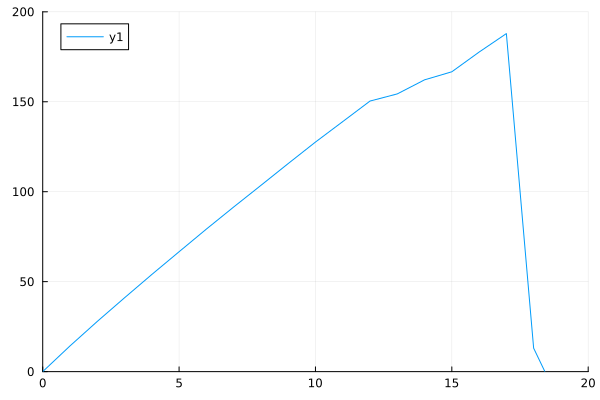

In [29]:
plot(0:108, logQ_m10, xlims = [0,20], ylims=[0,200])

In [49]:
wl_idg = load_wanglandau_jld2("/Users/mckinleypaul/Documents/montecarlo/segc_wl/examples/N108_L8/ideal_gasM10/wl_checkpoint_before_rezeroing.jld2")
logQid_corrected = correct_logQ(wl_idg)


109-element Vector{Float64}:
    0.0
   34.76244679093361
   68.90458077192307
  102.51478283107281
  135.8165693283081
  168.7839762866497
  201.75880233943462
  234.47393515706062
  267.1376211345196
  299.75734636187553
  332.2250442504883
  364.5056333690882
  396.70987598598003
    ⋮
 3018.585947960615
 3048.7431819736958
 3078.9296466112137
 3109.0354593992233
 3139.085142120719
 3169.230768352747
 3199.4029135257006
 3229.4718724787235
 3259.5670181661844
 3289.6222894638777
 3319.7272541075945
 3349.7605004906654

In [50]:
for ii in 1:109
    println(wl_idg.logQ_λN[:,ii])
end

[2482.6955060064793, 2517.4217947125435, 2517.4116617143154, 2517.3943296670914, 2517.4087702929974, 2517.4065159857273, 2517.413685411215, 2517.4042811095715, 2517.4317713975906, 2517.4449134618044]
[2517.457952797413, 2552.202221915126, 2552.2023627460003, 2552.232943803072, 2552.223219141364, 2552.2084137797356, 2552.1750180721283, 2552.179048925638, 2552.191502377391, 2552.232402354479]
[2551.6000867784023, 2586.3172929286957, 2586.2953319251537, 2586.317825883627, 2586.3667313307524, 2586.3479133695364, 2586.306344792247, 2586.315605893731, 2586.3395093530416, 2586.359208613634]
[2585.210288837552, 2619.9309840649366, 2619.927705988288, 2619.9214938282967, 2619.9088854789734, 2619.9038925617933, 2619.937643572688, 2619.9448736459017, 2619.913397729397, 2619.9044467955828]
[2618.5120753347874, 2653.2292327433825, 2653.2433156371117, 2653.2564571499825, 2653.236303538084, 2653.23552313447, 2653.1748686283827, 2653.1432262063026, 2653.112295240164, 2653.0989901721478]
[2651.479482293

In [51]:
println(minimum(wl_idg.H_λN))
println(maximum(wl_idg.H_λN))
println(mean(wl_idg.H_λN))

1001
27325
11687.155963302752


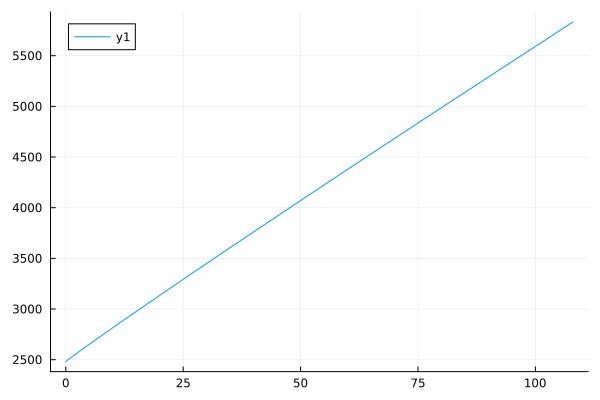

In [52]:
plot(0:108, wl_idg.logQ_λN[1,:])